In [1]:
%load_ext autoreload
%autoreload 2
### HIER DIE METHODEN REIN WIR IN TRAINNLP 
import torch
from torch import nn

import train
import TorchRandomSeed
import modelClass
import dataloader
from torch.utils.data import SubsetRandomSampler
from time import time
seed =1
seedObject = TorchRandomSeed.TorchRandomSeed(seed=1) 

_t_start = time()

with seedObject:
    droplist = []#["BloodPressure", "Pregnancies", "Age", "SkinThickness"]
    num_epochs = 2
    batch_size = 32
    test_size = 0.5 # is going to be split again in eval and test
    device = "cuda:0" if torch.cuda.is_available() else "cpu"
    #dirPath = "/home/rosario/explainable/Bachelor/"# root
    dirPath= "./" 

    modelsDirPath = dirPath+ "Models"

    print("calculating on: " +str(device))
    lr = 0.001 #slowed learningrate # 0.1 after 20 epoch full

    # load data
  
    #trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames, datasetType= dataloader.load_kaggle_diabetes_dataset(batch_size=batch_size)
    trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames, datasetType= dataloader.BreastCancerUCI(batch_size= batch_size, test_size=test_size)
    #trainloader ,random_indices_train, testloader,random_indices_test,X_train , X_test,  y_train , y_test, inputFeatures, outputFeatures, datasetName, featureNames= dataloader.dryBeanUCI(batch_size=batch_size , droplist= droplist)
    
    #model = modelClass.Net(inputFeatures= inputFeatures, out_features=outputFeatures)
    model= modelClass.BinaryClassification2HL64N(inputFeatures= inputFeatures, outputFeatures= outputFeatures)
    modelName = model.modelName
    
    #print(random_indices_test)

    #for i,c in testloader:
    #    print(i[0])
    #    print(X_test[random_indices_test[0]])
    #    break
    
    # Backward Propergation - loss and optimizer
    loss_function = nn.CrossEntropyLoss()
    #optimizer = torch.optim.SGD(model.parameters(),lr=lr)
    optimizer = torch.optim.Adam(model.parameters())
    #grads = train.train(trainloader, model, num_epochs, device, y_train,loss_function, optimizer)    
    total_gradientsList =  train.train(trainloader,random_indices_train, testloader,random_indices_test, model, num_epochs, device, y_train, y_test, loss_function, optimizer)
 
    #train.train(trainloader,random_indices_train, testloader,random_indices_test, model, num_epochs, device, y_train, y_test, loss_function, optimizer)
    print(dirPath)

    import evalModel
    import plotResults
    from matplotlib import pyplot as plt
    print("evaluating ...")
    loaderList = [testloader]
    nameList = ["test"]
    yList = [y_test]
    evalModel.doALLeval(model, modelsDirPath, dirPath, loaderList, device,optimizer, loss_function, num_epochs, nameList, yList, inputFeatures, random_indices_test)
    #print(dirPath)
    print(modelsDirPath)

calculating on: cuda:0
(569,)
(569, 30)
tensor([[-0.2435, -0.2473,  0.2055,  ..., -0.3219, -0.3210, -0.3220],
        [-0.2397, -0.2066,  0.1991,  ..., -0.3178, -0.3167, -0.3183],
        [-0.2316, -0.2095,  0.2728,  ..., -0.3239, -0.3222, -0.3240],
        ...,
        [-0.2447, -0.1818,  0.2593,  ..., -0.3372, -0.3360, -0.3371],
        [-0.2309, -0.2157,  0.2257,  ..., -0.3165, -0.3153, -0.3164],
        [-0.2343, -0.2549,  0.2200,  ..., -0.3162, -0.3152, -0.3164]])
train:shuffel = True
eval:shuffel = True
Epoch: 0
      Training_acc: 0.6161971830985915
-------------------

Epoch: 1
      Training_acc: 0.6161971830985915
-------------------

NOTE: THESE SAVED MODELS ARE BEEING OVERWRITTEN ON NEXT RUN
./
evaluating ...


1it [00:00,  5.03it/s]

0.6385964912280702


2it [00:00,  5.00it/s]

0.6385964912280702


3it [00:00,  4.79it/s]

0.6385964912280702


4it [00:00,  4.83it/s]

0.6385964912280702


5it [00:01,  4.97it/s]

0.6385964912280702


6it [00:01,  5.03it/s]

0.6385964912280702


7it [00:01,  5.25it/s]

0.6385964912280702


8it [00:01,  5.08it/s]

0.6385964912280702


9it [00:01,  5.21it/s]

0.6385964912280702
Progess: 44.44%
test acc: 63.86%
test Loss: 0.68
-------------------


10it [00:01,  5.28it/s]

0.6385964912280702


11it [00:02,  5.19it/s]

0.6385964912280702


12it [00:02,  5.22it/s]

0.6385964912280702


13it [00:02,  5.28it/s]

0.6385964912280702


14it [00:02,  5.13it/s]

0.6385964912280702


15it [00:02,  5.10it/s]

0.6385964912280702


16it [00:03,  5.21it/s]

0.6385964912280702


17it [00:03,  5.33it/s]

0.6385964912280702


18it [00:03,  5.17it/s]

0.6385964912280702
Progess: 94.44%
test acc: 63.86%
test Loss: 0.68
-------------------


./Models


plotting trainingResults...
cosine_similarity


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


percentageWeightsSignDifference3
weightsMagnitude3
L2Distance3
weightTrace3
averageGradientMagnitude3
plotting: GM GradientMagnitude averaged over features
GradientMagnitudePerFeature3
plotting: GM GradientMagnitude PerFeature
total_gradientsList
plotting: total gradient magnitude Averaged over number of grads in parameters


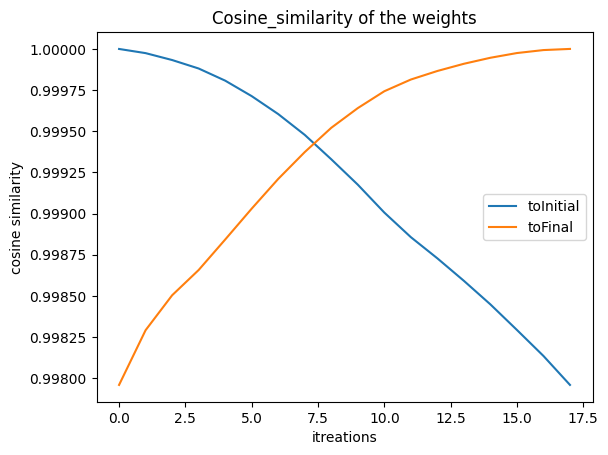

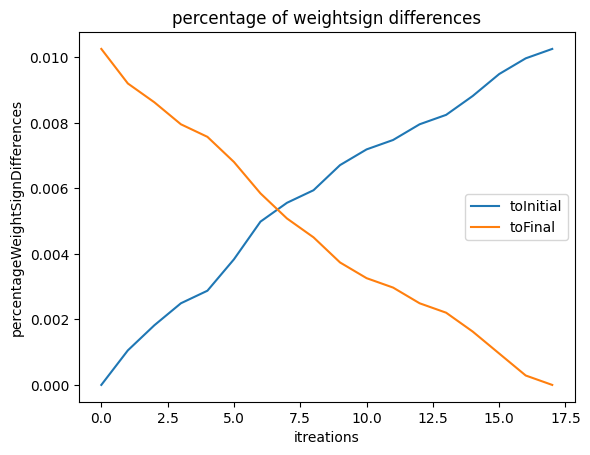

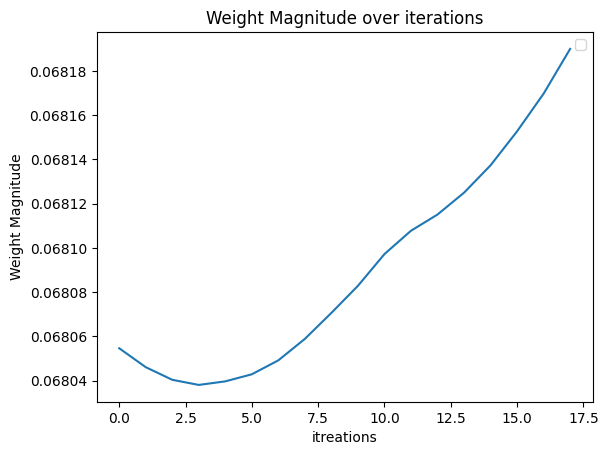

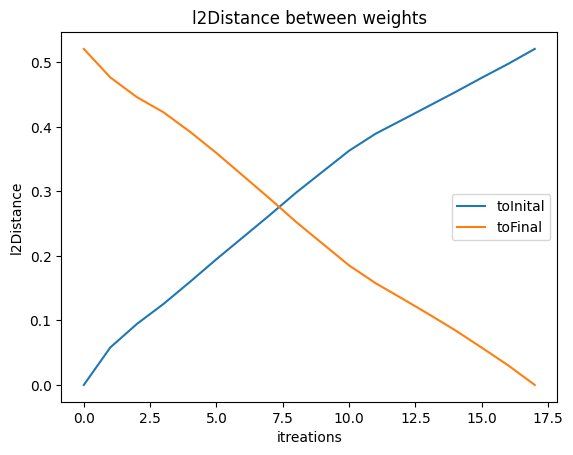

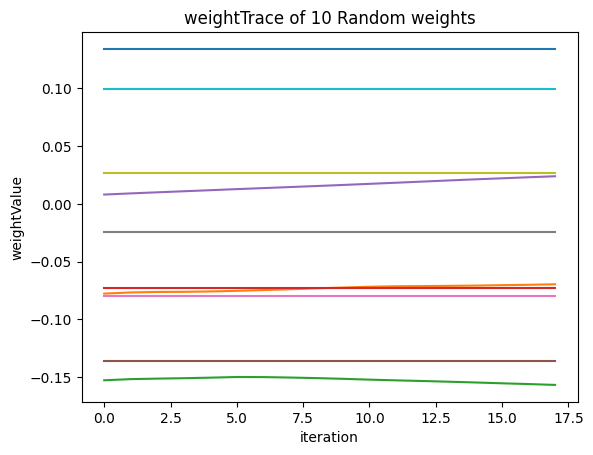

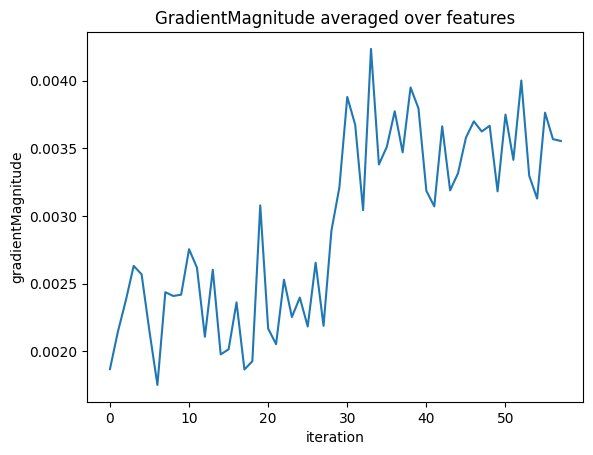

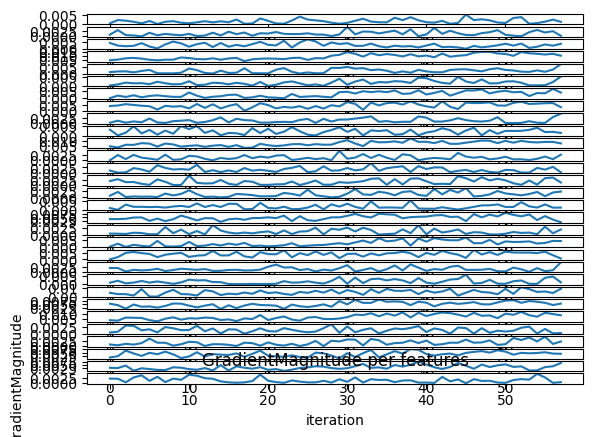

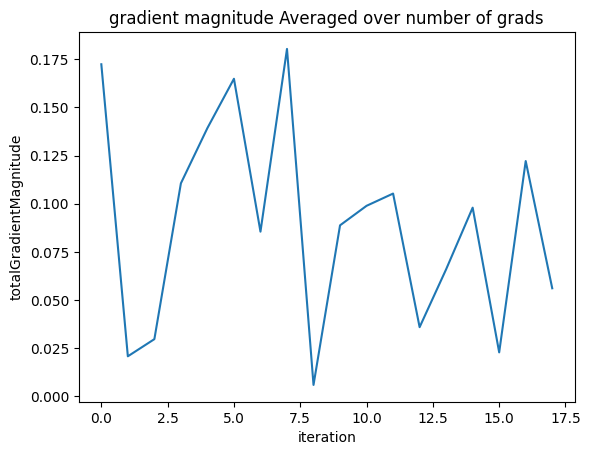

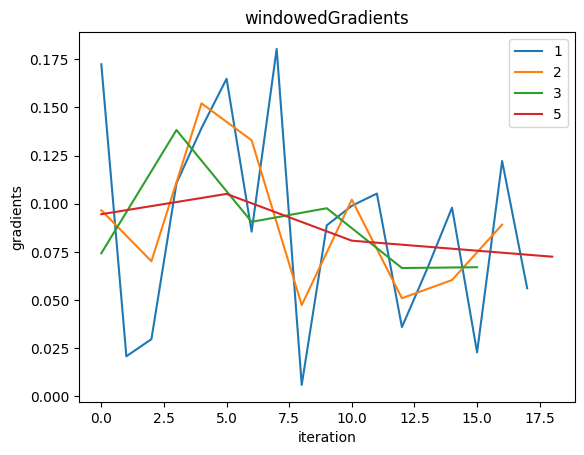

In [2]:
import utils
if datasetType == "NLP":
    dataPath= dirPath+ "NLP_Results/Trainingresults/"
else:
    dataPath= dirPath+ "Results/Trainingresults/"
utils.appendToNPZ(dataPath+ "data.npz", "Total_gradientsList_iteration", total_gradientsList)
data = utils.loadData(dataPath+ "data.npz")


plotResults.plotTrainingResults(data, dataPath)

In [3]:
import cega_utils
from datetime import datetime
import numpy as np

datasetType = "numerical"
now = datetime.now()
date_time_string = now.strftime("%Y-%m-%d %H:%M:%S")
# Replace space with underscore
date_time_string = date_time_string.replace(" ", "_")

pathToNPZ =  cega_utils.runCEGA(dirPath, modelsDirPath, model, X_test, device, data,date_time_string, testloader , datasetType)





(2, 29, 30)
numerical


  0%|          | 0/18 [00:00<?, ?it/s]

0


  6%|▌         | 1/18 [00:00<00:03,  5.16it/s]

1


 11%|█         | 2/18 [00:00<00:02,  5.36it/s]

2


 17%|█▋        | 3/18 [00:00<00:02,  5.37it/s]

3


 22%|██▏       | 4/18 [00:00<00:02,  5.36it/s]

4


 28%|██▊       | 5/18 [00:00<00:02,  5.42it/s]

5


 33%|███▎      | 6/18 [00:01<00:02,  5.45it/s]

6


 39%|███▉      | 7/18 [00:01<00:02,  5.42it/s]

7


 44%|████▍     | 8/18 [00:01<00:01,  5.46it/s]

8


 50%|█████     | 9/18 [00:01<00:01,  5.38it/s]

9


 56%|█████▌    | 10/18 [00:01<00:01,  5.28it/s]

10


 61%|██████    | 11/18 [00:02<00:01,  5.26it/s]

11


 67%|██████▋   | 12/18 [00:02<00:01,  5.24it/s]

12


 72%|███████▏  | 13/18 [00:02<00:00,  5.22it/s]

13


 78%|███████▊  | 14/18 [00:02<00:00,  5.24it/s]

14


 83%|████████▎ | 15/18 [00:02<00:00,  4.91it/s]

15


 89%|████████▉ | 16/18 [00:03<00:00,  4.73it/s]

16


 94%|█████████▍| 17/18 [00:03<00:00,  4.78it/s]

17


  0%|          | 0/18 [00:00<?, ?it/s]

acc
0.0
criterion:
0.0
supportOfRule
0.6491228070175439
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
0.0
criterion:
0.0
supportOfRule
0.5473684210526316
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.3333333333333333
acc
1.0
criterion:
0.6407232755171874
supportOfRule
0.4105263157894737
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
0.0
criterion:
0.0
supportOfRule
0.45964912280701753
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.43157894736842106
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
0.0
criterion:
0.0
supportOfRule
0.43859649122807015
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0

  6%|▌         | 1/18 [00:09<02:34,  9.11s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.4456140350877193
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.45964912280701753
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
0.0
criterion:
0.0
supportOfRule
0.5473684210526316
acc
0.0
criterion:
0.0
supportOfRule
0.4456140350877193
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.43859649122807015
acc
0.0
criterion:
0.0
supportOfRule
0.4245614035087719
acc
0.0
criterion:
0.0
supportOfRule
0.43157894736842106
acc
0.0
criterion:
0.0
supportOfRule
0.43157894736842106
acc
1.0


 11%|█         | 2/18 [00:15<02:03,  7.71s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.4456140350877193
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6569466853317864
supportOfRule
0.43157894736842106
acc
0.0
criterion:
0.0
supportOfRule
0.45964912280701753
acc
1.0
criterion:
0.8056815791722831
supportOfRule
0.6491228070175439
acc
0.0
criterion:
0.0
supportOfRule
0.43859649122807015
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
0.0
criterion:
0.0
supportOfRule
0.43859649122807015
acc
1.0
criterion:
0.6407232755171874
supportOfRule
0.4105263157894737
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0

 17%|█▋        | 3/18 [00:21<01:41,  6.79s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.45964912280701753
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
0.0
criterion:
0.0
supportOfRule
0.4456140350877193
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6569466853317864
supportOfRule
0.43157894736842106
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6407232755171874
supportOfRule
0.4105263157894737
acc
0.0
criterion:
0.0
supportOfRule
0.43859649122807015
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035

 22%|██▏       | 4/18 [00:27<01:29,  6.37s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.45964912280701753
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
1.0
criterion:
0.7745966692414834
supportOfRule
0.6
acc
0.0
criterion:
0.0
supportOfRule
0.4456140350877193
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.7562604211258206
supportOfRule
0.5719298245614035
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6407232755171874
supportOfRule
0.4105263157894737
acc
0.0
criterion:
0.0
supportOfRule
0.43157894736842106
acc
0.0
criterion:


 28%|██▊       | 5/18 [00:33<01:19,  6.15s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
0.0
criterion:
0.0
supportOfRule
0.4456140350877193
acc
1.0
criterion:
0.6569466853317864
supportOfRule
0.43157894736842106
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6701662532667129
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.7562604211258206
supportOfRule
0.5719298245614035
acc
1.0
criterion:
0.6701662532667129
supportOfRule
0.44912280701754387
acc
0.0
criterion:
0.0
supportOfRule
0.2771929824561403
acc
1.0
criterion:
0.64072327551

 33%|███▎      | 6/18 [00:38<01:11,  5.97s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.6491228070175439
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.4456140350877193
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6569466853317864
supportOfRule
0.43157894736842106
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
0.0
criterion:
0.0
supportOfRule
0.2771929824561403
acc
1.0
criterion:
0.6407232755171874
supportOfRule
0.4105263157894737
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
0.0

 39%|███▉      | 7/18 [00:43<01:00,  5.52s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
0.0
criterion:
0.0
supportOfRule
0.4456140350877193
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6569466853317864
supportOfRule
0.43157894736842106
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
1.0
criterion:
0.7398435111918139
supportOfRule
0.5473684210526316
acc
0.0
criterion:
0.0
supportOfRule
0.2771929824561403
acc
1.0
criterion:
0.6407232755171874
supportOfRule
0.4105263157894737
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
0.0
criterion:
0.0
supportOfRu

 44%|████▍     | 8/18 [00:48<00:53,  5.39s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
1.0
criterion:
0.6569466853317864
supportOfRule
0.43157894736842106
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
0.0
criterion:
0.0
supportOfRule
0.6
acc
0.0
criterion:
0.0
supportOfRule
0.2771929824561403
acc
1.0
criterion:
0.6407232755171874
supportOfRule
0.4105263157894737
acc
0.0
criterion:
0.0
supportOfRule
0.4456140350877193
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
0.0
criterion:
0.0
supportOfRule
0.43157894736842106
acc
1.0

 50%|█████     | 9/18 [00:53<00:49,  5.46s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
1.0
criterion:
0.6569466853317864
supportOfRule
0.43157894736842106
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
0.0
criterion:
0.0
supportOfRule
0.6491228070175439
acc
0.0
criterion:
0.0
supportOfRule
0.2771929824561403
acc
1.0
criterion:
0.6407232755171874
supportOfRule
0.4105263157894737
acc
0.0
criterion:
0.0
supportOfRule
0.4
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0

 56%|█████▌    | 10/18 [00:59<00:42,  5.36s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6569466853317864
supportOfRule
0.43157894736842106
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
0.0
criterion:
0.0
supportOfRule
0.4842105263157895
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
0.0
criterion:
0.0
supportOfRule
0.5719298245614035
acc
1.0
criterion:
0.6753816335059705
supportOf

 61%|██████    | 11/18 [01:04<00:36,  5.23s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6569466853317864
supportOfRule
0.43157894736842106
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
0.0
criterion:
0.0
supportOfRule
0.2771929824561403
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
1.0
criterion:
0.6622661785325219
supportOfRule
0.43859649122807015
acc
0.0
criterion:
0.0
supportO

 67%|██████▋   | 12/18 [01:08<00:30,  5.12s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.4842105263157895
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6569466853317864
supportOfRule
0.43157894736842106
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
0.0
criterion:
0.0
supportOfRule
0.5719298245614035
acc
0.0
criterion:
0.0
supportOfRule
0.2771929824561403
acc
1.0
criterion:
0.6407232755171874
supportOfRule
0.410526315

 72%|███████▏  | 13/18 [01:13<00:25,  5.09s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
1.0
criterion:
0.7058651528692202
supportOfRule
0.4982456140350877
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6569466853317864
supportOfRule
0.43157894736842106
acc
1.0
criterion:
0.6622661785325219
supportOfRule
0.43859649122807015
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
0.0
criterio

 78%|███████▊  | 14/18 [01:18<00:19,  4.87s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.4842105263157895
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6569466853317864
supportOfRule
0.43157894736842106
acc
1.0
criterion:
0.6622661785325219
supportOfRule
0.43859649122807015
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
1.0
criterion:
0.7398435111918139
supportOfRule
0.5473684210526316
acc
0.0
criterion:
0.0
supportOf

 83%|████████▎ | 15/18 [01:22<00:13,  4.66s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.5719298245614035
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6569466853317864
supportOfRule
0.43157894736842106
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
0.0
criterion:
0.0
supportOfRule
0.4842105263157895
acc
1.0
criterion:
0.7058651528692202
supportOfRule
0.4982456140350877
acc
0.0
criterion:
0.0
supportOfRule
0.649122807

 89%|████████▉ | 16/18 [01:27<00:09,  4.66s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.7058651528692202
supportOfRule
0.4982456140350877
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
0.0
criterion:
0.0
supportOfRule
0.6491228070175439
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6569466853317864
supportOfRule
0.43157894736842106
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
0.0
criterion:
0.0
supportOfRule
0.2771929824561403
acc
0.0
criterion:
0.0
supportOfRule
0.4
acc
0.0
criterion:
0.0
supportOfRule
0.4456140350877193
acc
0.0


 94%|█████████▍| 17/18 [01:31<00:04,  4.52s/it]

acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.5719298245614035
acc
0.0
criterion:
0.0
supportOfRule
0.5263157894736842
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
0.0
criterion:
0.0
supportOfRule
0.44912280701754387
acc
1.0
criterion:
0.6805570473787206
supportOfRule
0.4631578947368421
acc
1.0
criterion:
0.6727789971063072
supportOfRule
0.45263157894736844
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
0.0
criterion:
0.0
supportOfRule
0.43508771929824563
acc
0.0
criterion:
0.0
supportOfRule
0.4666666666666667
acc
1.0
criterion:
0.6569466853317864
supportOfRule
0.43157894736842106
acc
1.0
criterion:
0.6622661785325219
supportOfRule
0.43859649122807015
acc
1.0
criterion:
0.6461763378901481
supportOfRule
0.41754385964912283
acc
1.0
criterion:
0.6753816335059705
supportOfRule
0.45614035087719296
acc
1.0
criterion:
0.6779742788683193
supportOfRule
0.45964912280701753
acc
1.0
criterion:
0.6727789971

100%|██████████| 18/18 [01:35<00:00,  5.31s/it]


In [4]:
import os
rules_data = np.load(pathToNPZ , allow_pickle=True)

pathToDiscriminative_rules = "./Results/rulesResults/discriminative_rules/"
pathToCharacteristic_rules = "./Results/rulesResults/characteristic_rules"
resultPaths_dicriminative_rules = os.listdir(pathToDiscriminative_rules)
resultPaths_characteristic_rules = os.listdir(pathToCharacteristic_rules)
resultPaths_dicriminative_rules= np.sort(resultPaths_dicriminative_rules)

#get last generated rule

mostRecentResultPaths_discriminative = pathToDiscriminative_rules + (resultPaths_dicriminative_rules[-1])
data = utils.loadData(mostRecentResultPaths_discriminative)
temp_rules_list_overIterations = data["rules_list_overIterations"]
print("...")
print(len(temp_rules_list_overIterations))
print(len(data["rulePrecisionListPerRule_overIterations"]))

trackedRules_OHE = cega_utils.trackRulesList(temp_rules_list_overIterations, data["rulePrecisionListPerRule_overIterations"])
print(pathToNPZ)
utils.appendToNPZ(pathToNPZ, "trackedRules_OHE", trackedRules_OHE)

plotResults.plotRulesResults(data)
_t_end = time()
print(f"Training finished in {int(_t_end - _t_start)} s")

...
80
80
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
232
80
64
ßßß
as
2

IndexError: list index out of range